# Loads eval matrix of two models and computes the difference grid between them over all datasets for 3 metrics

In [ ]:
import sys
sys.path.append("../")

import os
import json
import time
import datetime

import openpyxl
from openpyxl import Workbook
from openpyxl import load_workbook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
model_dict = {"InversionNet (L1+L2+VGG)": "InversionNet",
              "InversionNet (L1)": "InversionNet_ckpt",
              "VelocityGAN (L1)": "Velocity_GAN",
              "XNet (Adam)" : "Invertible_XNet_Adam",
              "Invertible X-Net" : "Invertible_XNet",
              "Invertible X-Net (Cycle)" : "Invertible_XNet_cycle_warmup",
              "IUnetInverseModel" : "IUnetInverseModel",
              "Latent-UNet (Small)" : "UNetInverseModel_17M",
              "Latent U-Net (Large)" : "UNetInverseModel_33M",
              "Auto-Linear": "AutoLinear_Inversion_ckpt"}

mapping = {
    'FlatVel-A': 'FVA',
    'FlatVel-B': 'FVB',
    'CurveVel-A': 'CVA',
    'CurveVel-B': 'CVB',
    'FlatFault-A': 'FFA',
    'FlatFault-B': 'FFB',
    'CurveFault-A': 'CFA',
    'CurveFault-B': 'CFB',
    'Style-A': 'STA',
    'Style-B': 'STB'
}

basepath = "../Metrics_final/"
prefix = "eval_metric"

model_names = ['FlatVel-A', 'FlatVel-B',
          'CurveVel-A', 'CurveVel-B',
         'FlatFault-A', 'FlatFault-B',
         'CurveFault-A', 'CurveFault-B',
         'Style-A', 'Style-B']

coded_model_names = [mapping[model_name] for model_name in model_names]



In [3]:
save_dir = "../PaperFigures/AAAI-ZeroShotGrids/"
# os.makedirs(save_dir)

# Latent UNET vs Inverion Net 

In [4]:
mode = "Inverse"
model_labels = ["Latent U-Net (Large)", "InversionNet (L1)"]
metric_list = ["Velocity_SSIM", "Velocity_unnorm_MAE", "Velocity_unnorm_MSE"] if mode == "Inverse" else ["Waveform_SSIM", "Waveform_unnorm_MAE", "Waveform_unnorm_MSE"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)


for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

In [5]:
mode = "Inverse"
model_labels = ["Latent U-Net (Large)", "InversionNet (L1+L2+VGG)"]
metric_list = ["Velocity_SSIM", "Velocity_unnorm_MAE", "Velocity_unnorm_MSE"] if mode == "Inverse" else ["Waveform_SSIM", "Waveform_unnorm_MAE", "Waveform_unnorm_MSE"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

# Latent UNET vs Velocity GAN

In [6]:
mode = "Inverse"
model_labels = ["Latent U-Net (Large)", "VelocityGAN (L1)"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

# XNET vs Inverion Net 

In [7]:
mode = "Inverse"
model_labels = ["Invertible X-Net", "InversionNet (L1)"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

# XNET vs Velocity GAN

In [8]:
mode = "Inverse"
model_labels = ["Invertible X-Net", "VelocityGAN (L1)"]
metric_list = ["Velocity_SSIM", "Velocity_unnorm_MAE", "Velocity_unnorm_MSE"] if mode == "Inverse" else ["Waveform_SSIM", "Waveform_unnorm_MAE", "Waveform_unnorm_MSE"]


eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

# XNet vs Unet Large

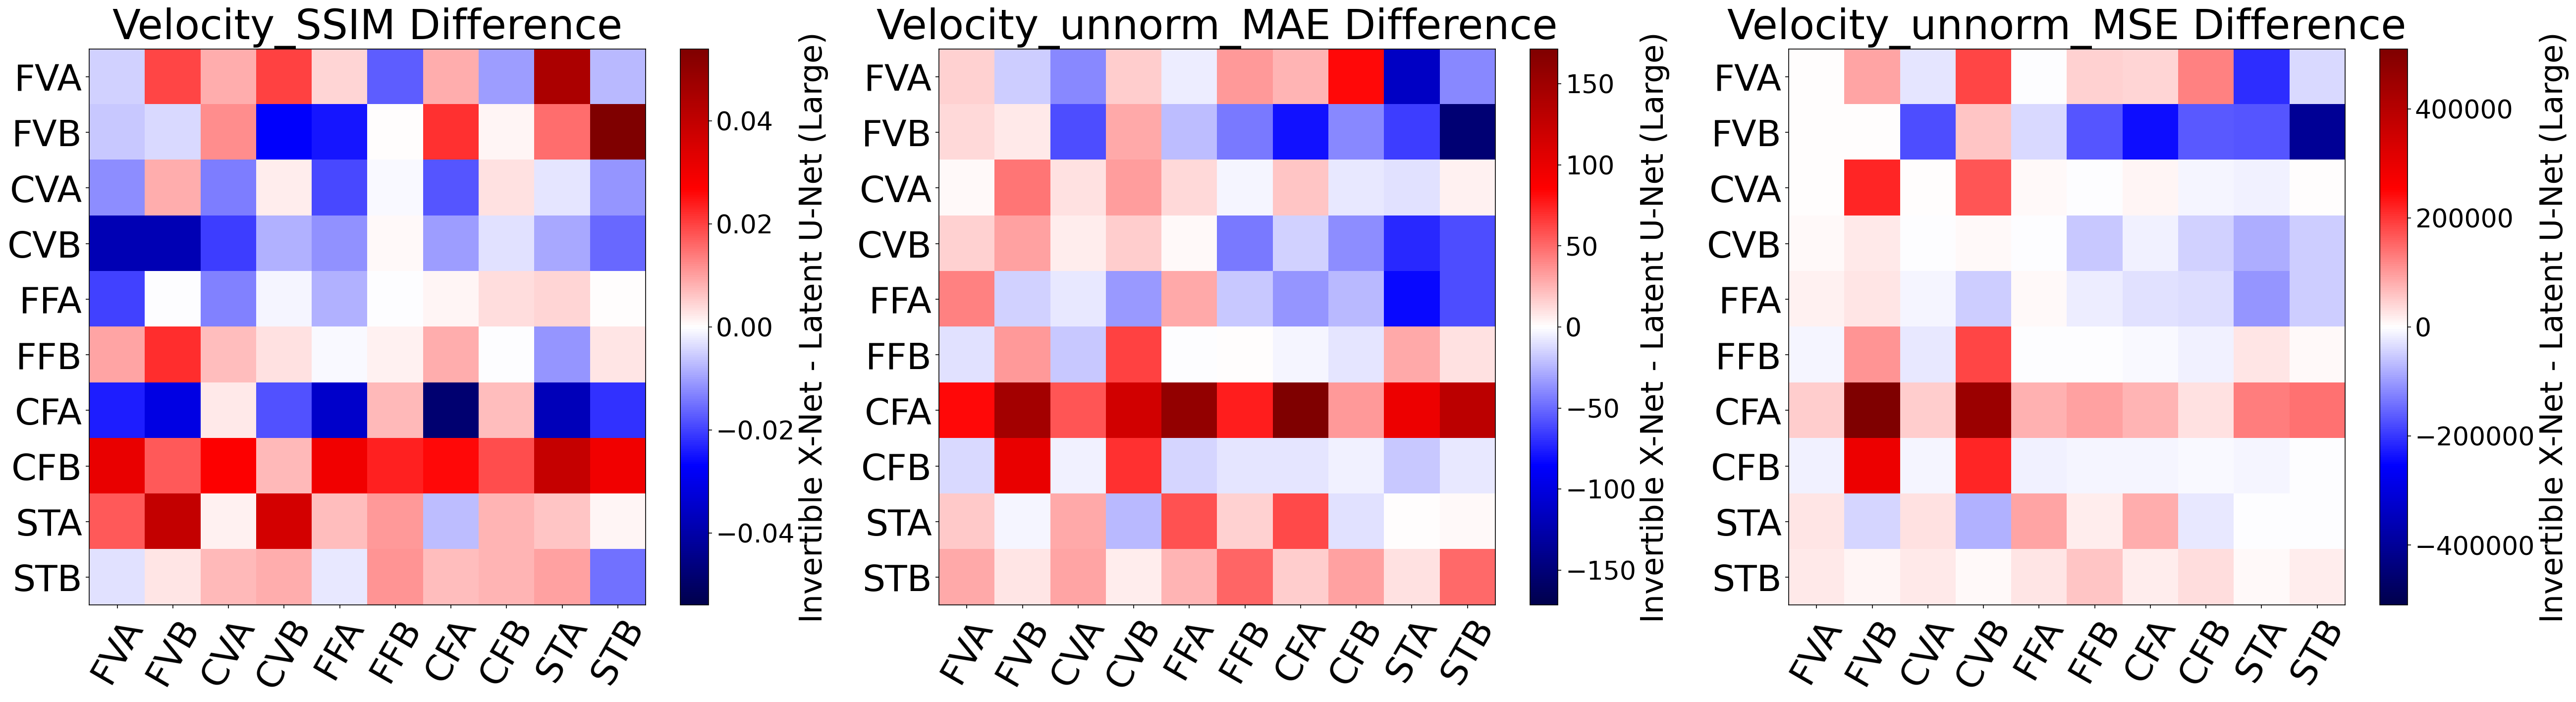

In [9]:
mode = "Inverse"
model_labels = ["Invertible X-Net", "Latent U-Net (Large)"]
metric_list = ["Velocity_SSIM", "Velocity_unnorm_MAE", "Velocity_unnorm_MSE"] if mode == "Inverse" else ["Waveform_SSIM", "Waveform_unnorm_MAE", "Waveform_unnorm_MSE"]


eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

# UNet Large vs UNet Small

In [10]:
mode = "Inverse"
model_labels = ["Latent U-Net (Large)", "Latent-UNet (Small)"]
metric_list = ["Velocity_SSIM", "Velocity_unnorm_MAE", "Velocity_unnorm_MSE"] if mode == "Inverse" else ["Waveform_SSIM", "Waveform_unnorm_MAE", "Waveform_unnorm_MSE"]


eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

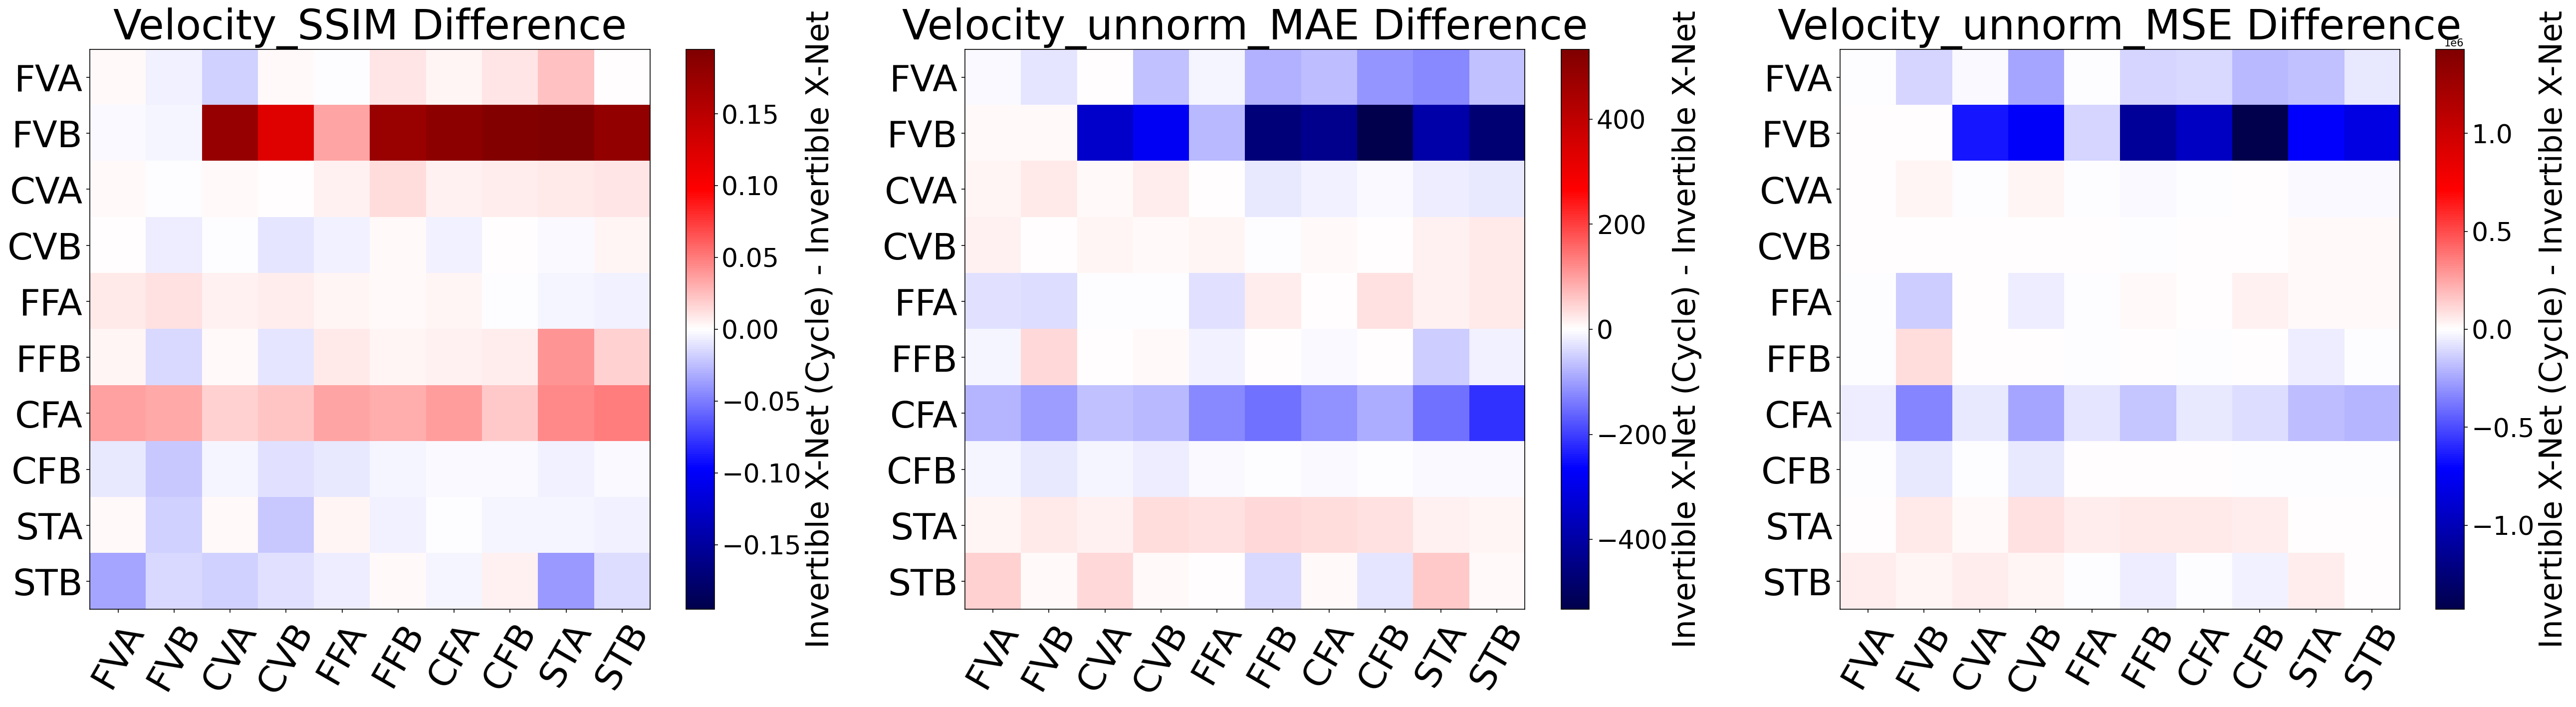

In [11]:
mode = "Inverse"
model_labels = [ "Invertible X-Net (Cycle)", "Invertible X-Net"]
metric_list = ["Velocity_SSIM", "Velocity_unnorm_MAE", "Velocity_unnorm_MSE"] if mode == "Inverse" else ["Waveform_SSIM", "Waveform_unnorm_MAE", "Waveform_unnorm_MSE"]


eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)
    
plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

In [12]:
mode = "Inverse"
model_labels = [ "Invertible X-Net", "Auto-Linear"]
metric_list = ["Velocity_SSIM", "Velocity_unnorm_MAE", "Velocity_unnorm_MSE"] if mode == "Inverse" else ["Waveform_SSIM", "Waveform_unnorm_MAE", "Waveform_unnorm_MSE"]


eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

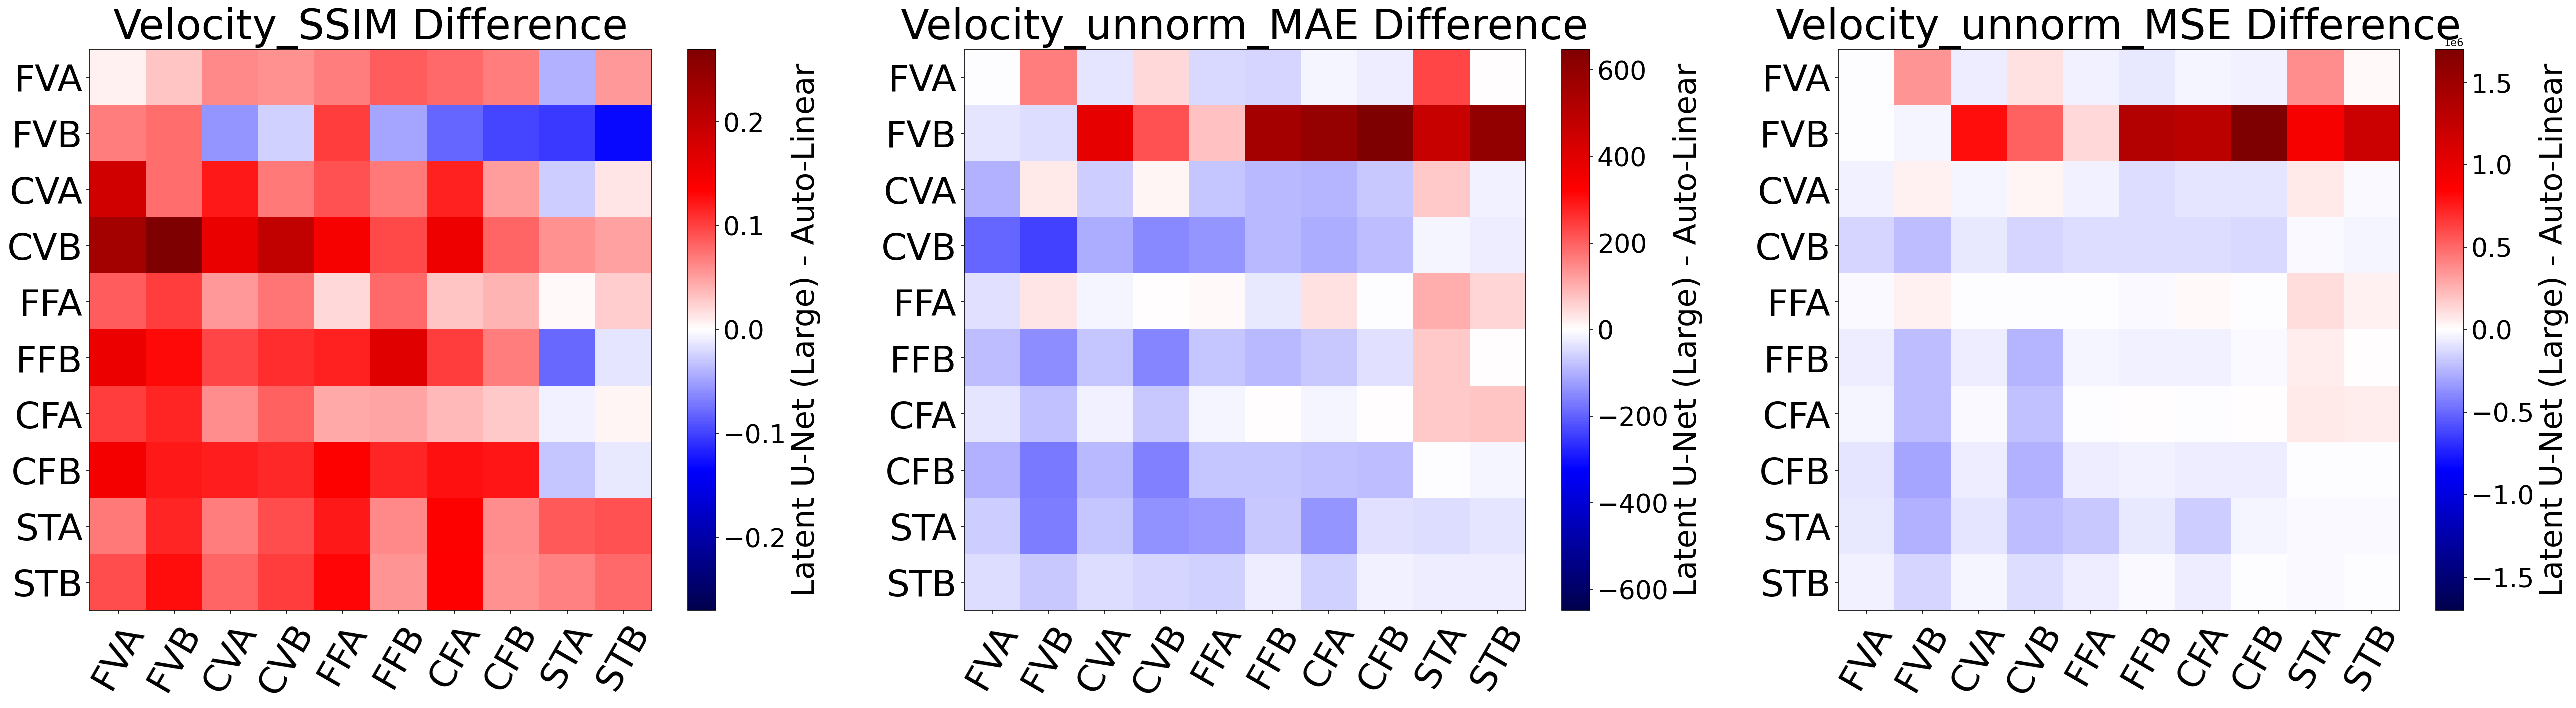

In [13]:
mode = "Inverse"
model_labels = ["Latent U-Net (Large)", "Auto-Linear"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

# Forward Problem

In [14]:
model_dict = {"WaveformNet": "WaveformNet",
              "FNO": "FNO",
              "X-Net (Adam)" : "Invertible_XNet_Adam",
              "Invertible X-Net" : "Invertible_XNet",
              "Invertible X-Net (Cycle)" : "Invertible_XNet_cycle_warmup",
              "IUnetForwardModel" : "IUnetForwardModel",
              "Latent U-Net (Small)" : "UNetForwardModel_17M",
              "Latent U-Net (Large)" : "UNetForwardModel_33M",
              "Auto-Linear": "AutoLinear_Forward_ckpt"
             }
mode = "Forward"
metric_list = ["Velocity_SSIM", "Velocity_unnorm_MAE", "Velocity_unnorm_MSE"] if mode == "Inverse" else ["Waveform_SSIM", "Waveform_unnorm_MAE", "Waveform_unnorm_MSE"]

# Latent UNet vs FNO

In [15]:

model_labels = ["Latent U-Net (Large)", "FNO"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show() 

# Latent UNet vs WaveformNet

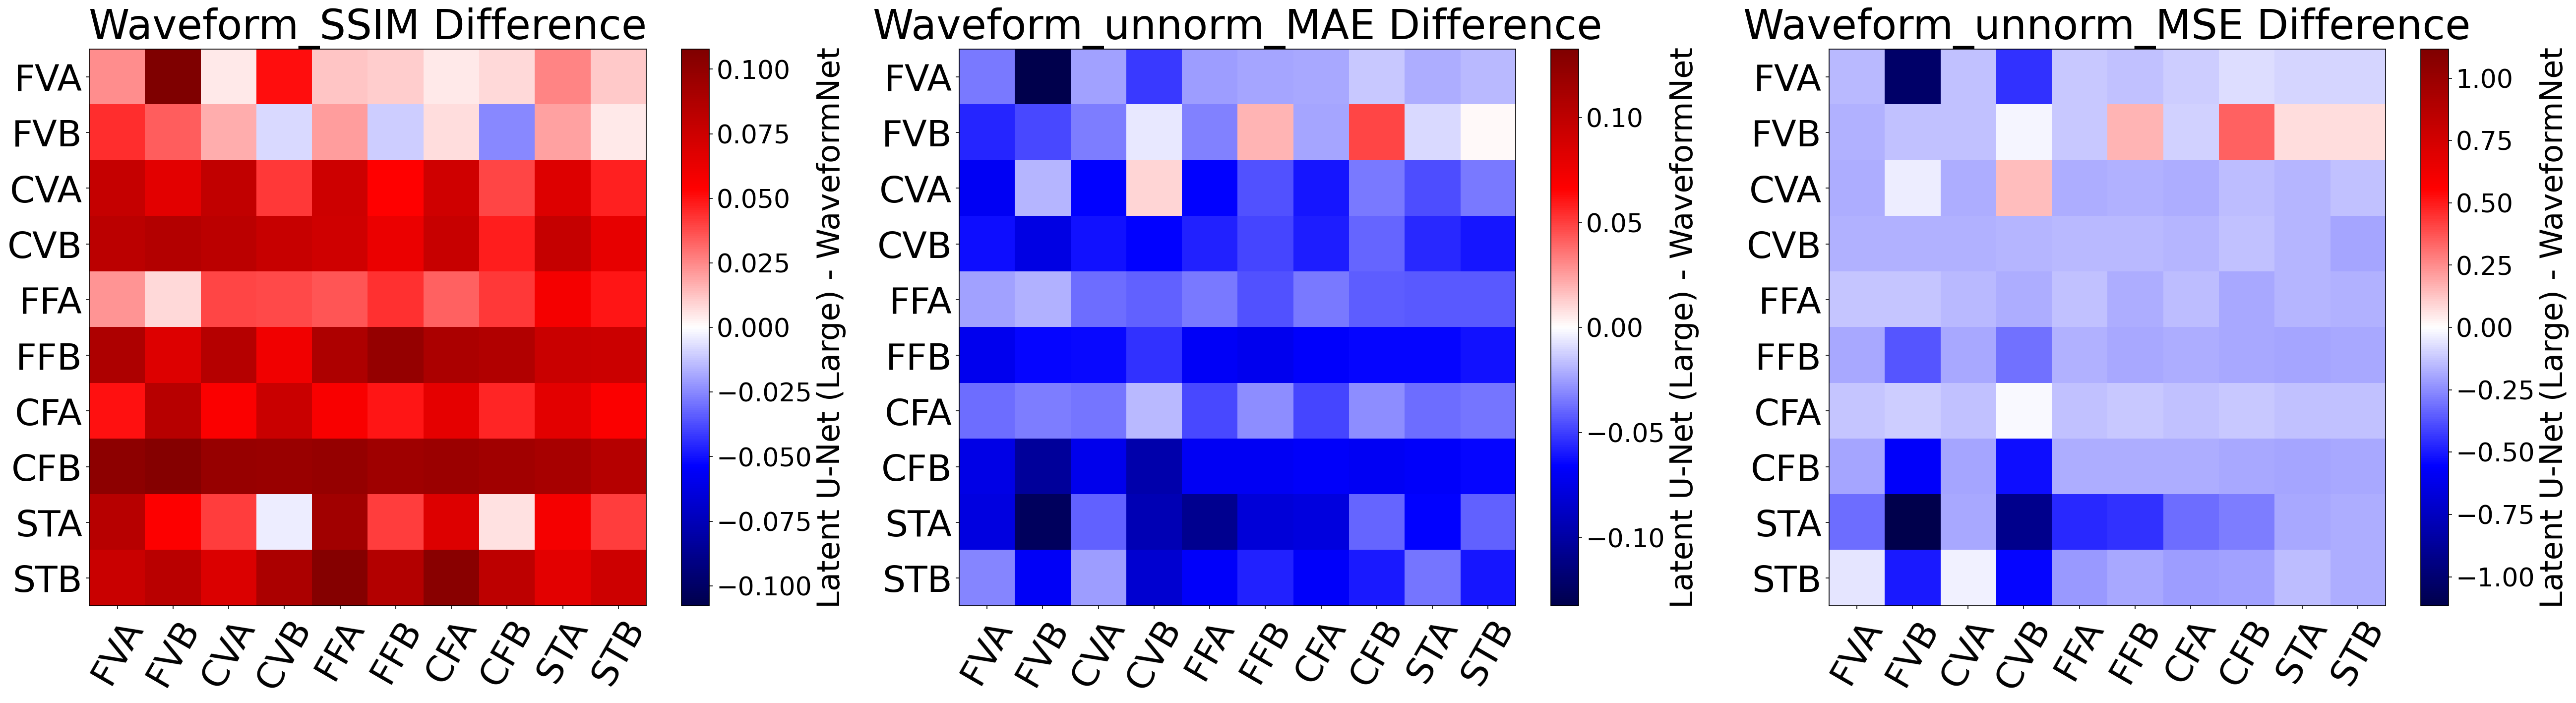

In [16]:

model_labels = ["Latent U-Net (Large)", "WaveformNet"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

# XNet vs WaveformNet

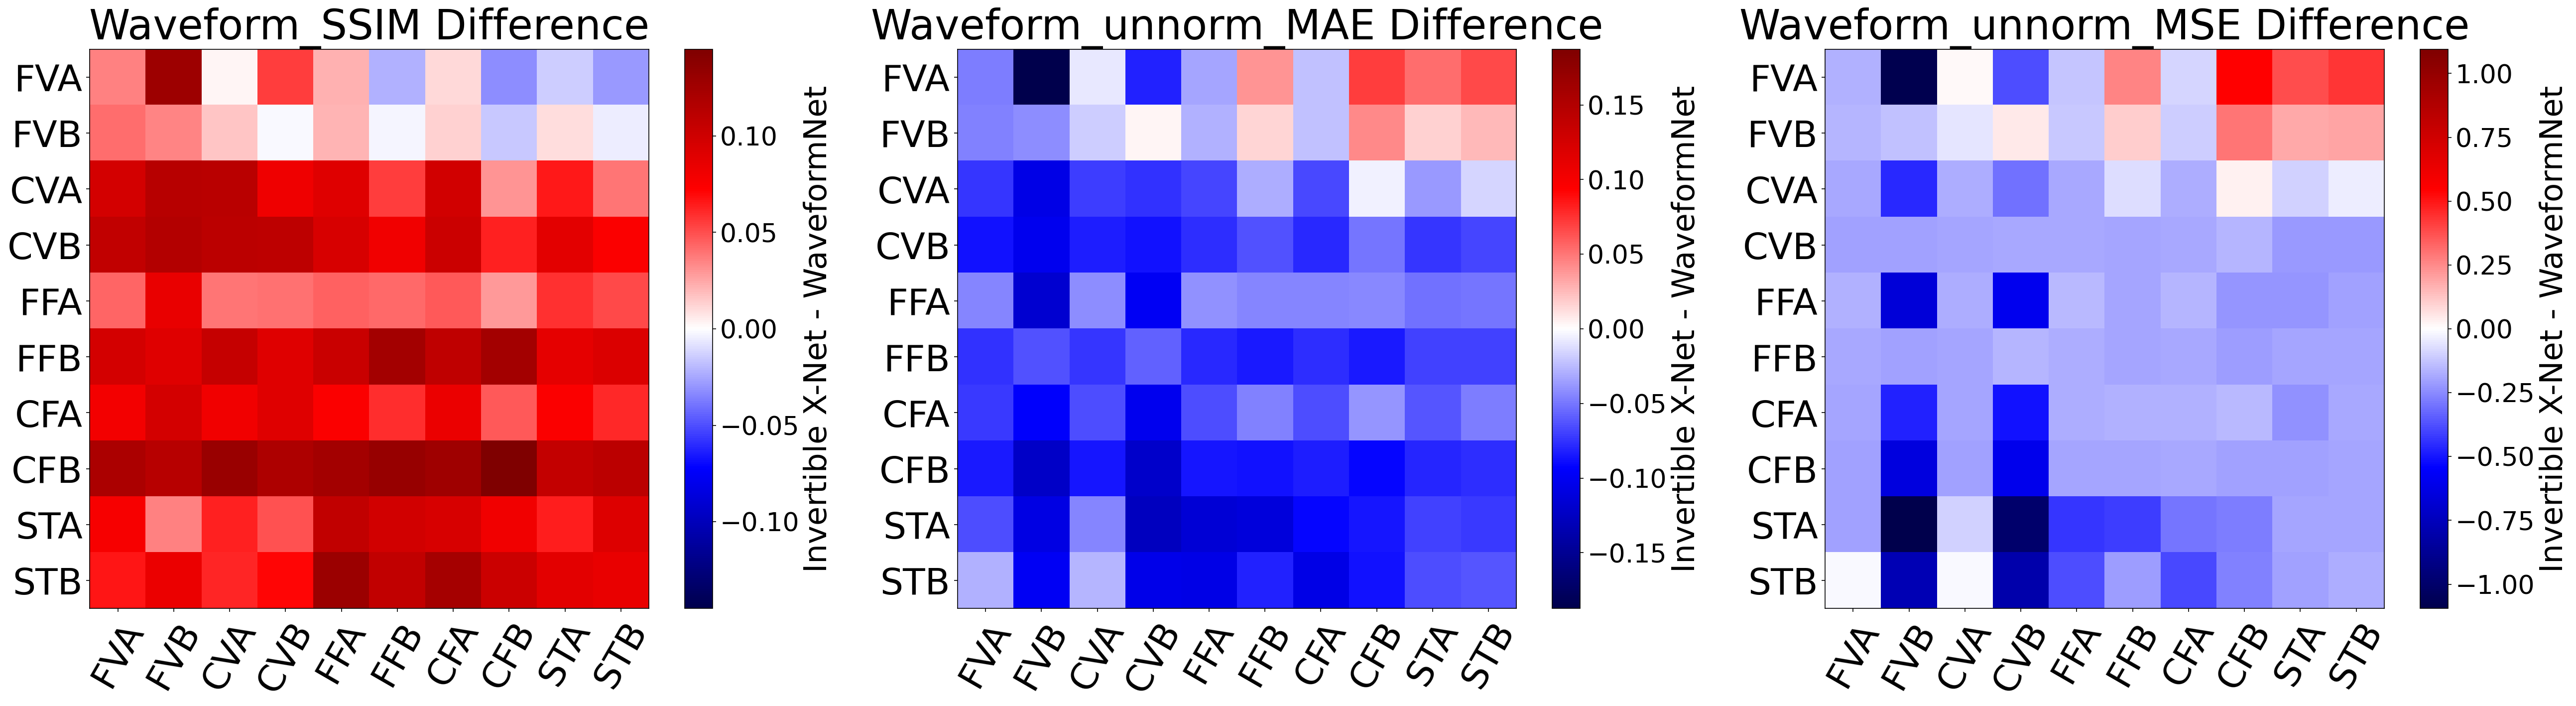

In [17]:

model_labels = ["Invertible X-Net", "WaveformNet"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

# XNet vs FNO

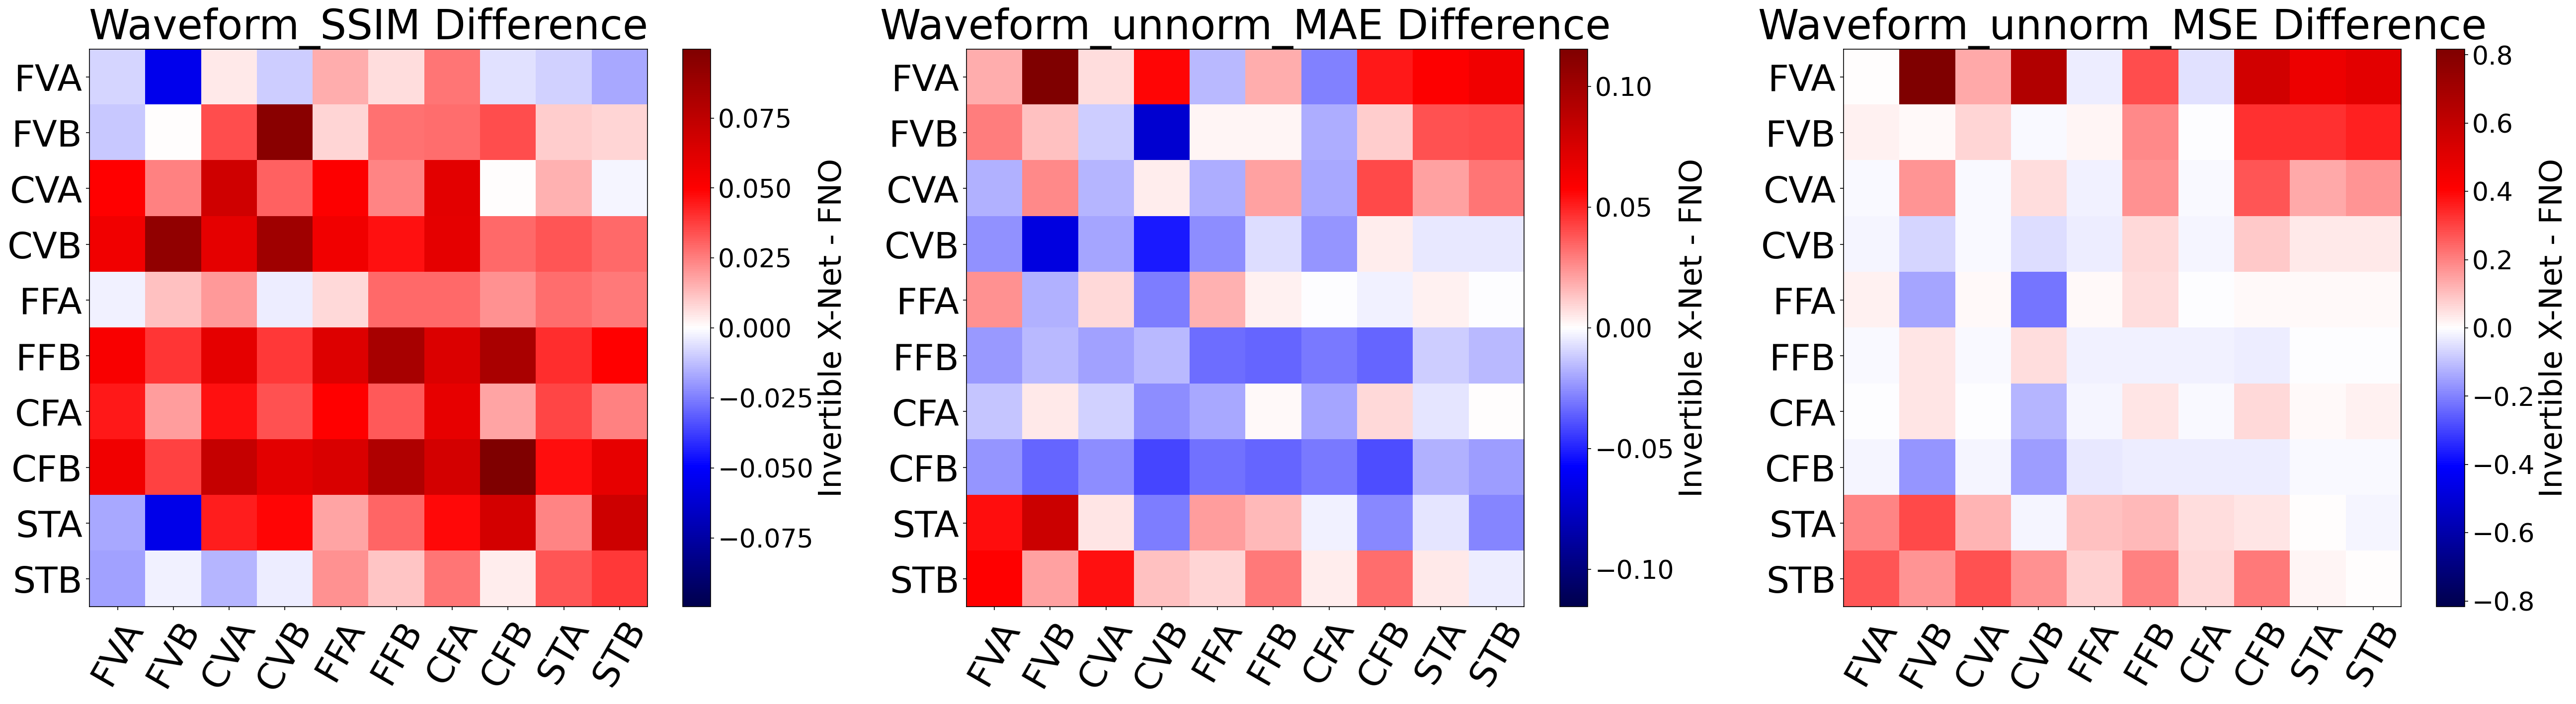

In [18]:
model_labels = ["Invertible X-Net", "FNO"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

# XNet vs Latent U-Net Large

In [19]:
model_labels = ["Invertible X-Net", "Latent U-Net (Large)"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
# plt.show()

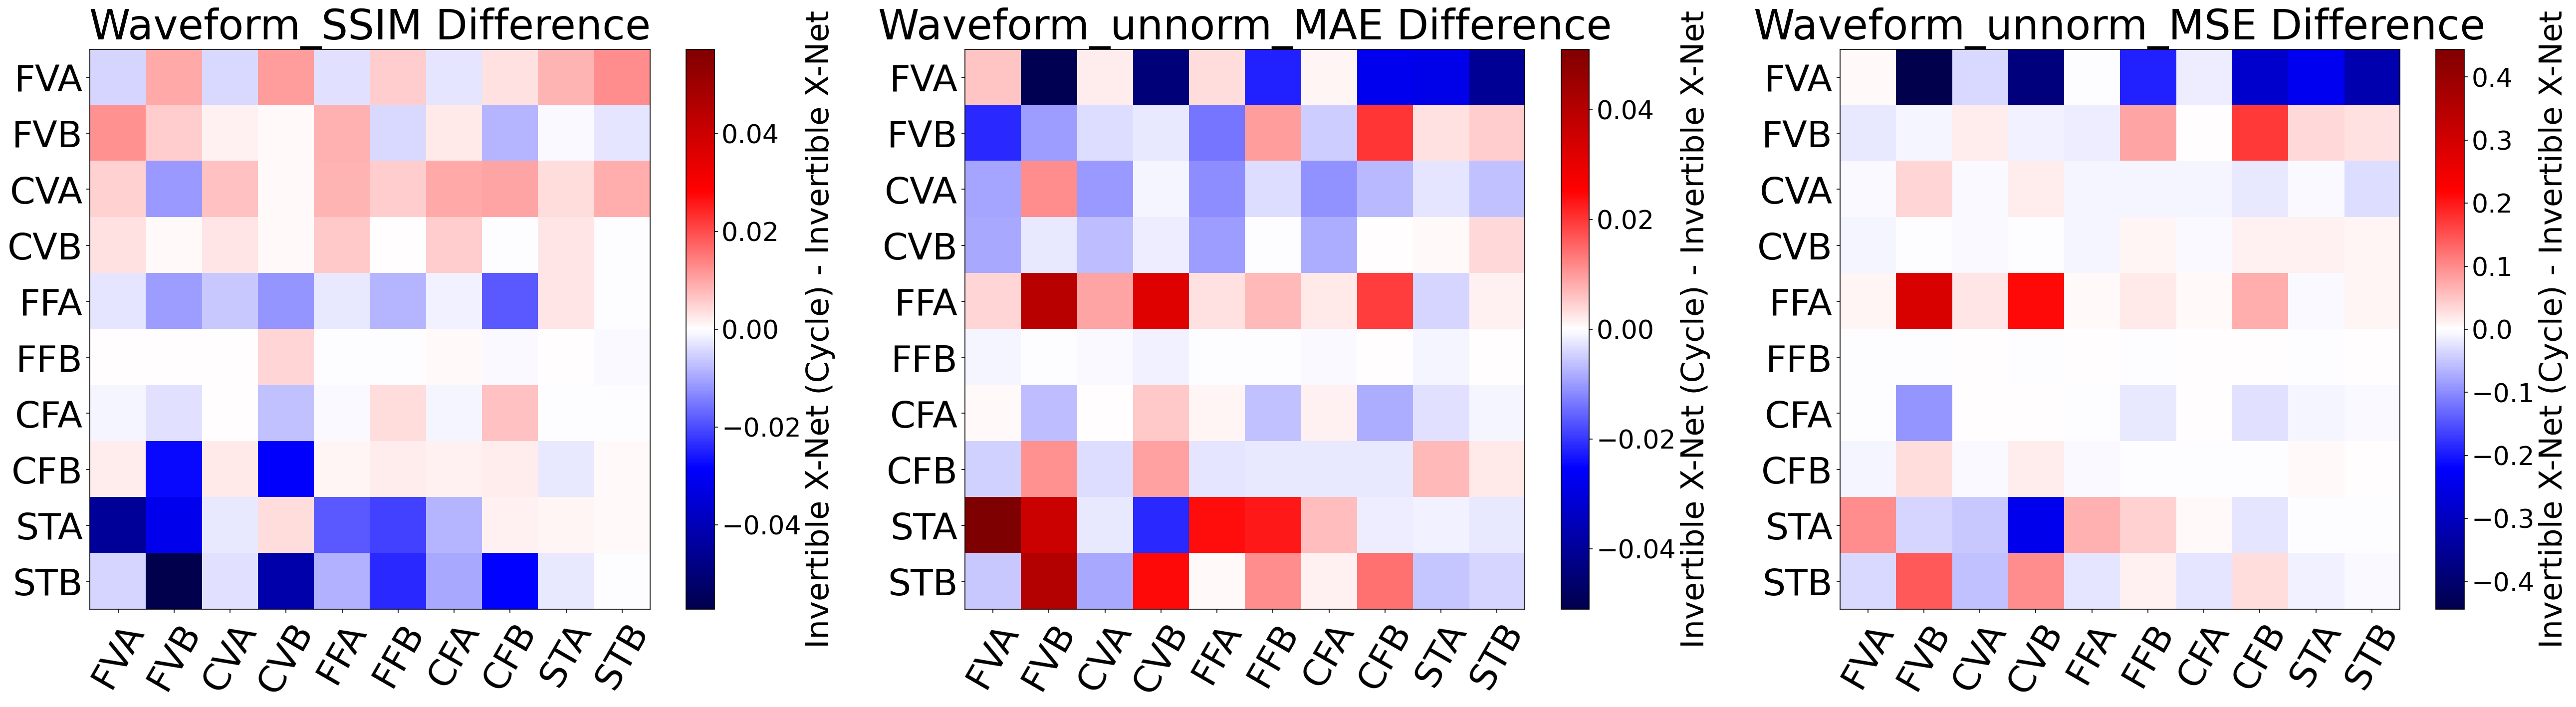

In [20]:
model_labels = ["Invertible X-Net (Cycle)", "Invertible X-Net"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
plt.show()

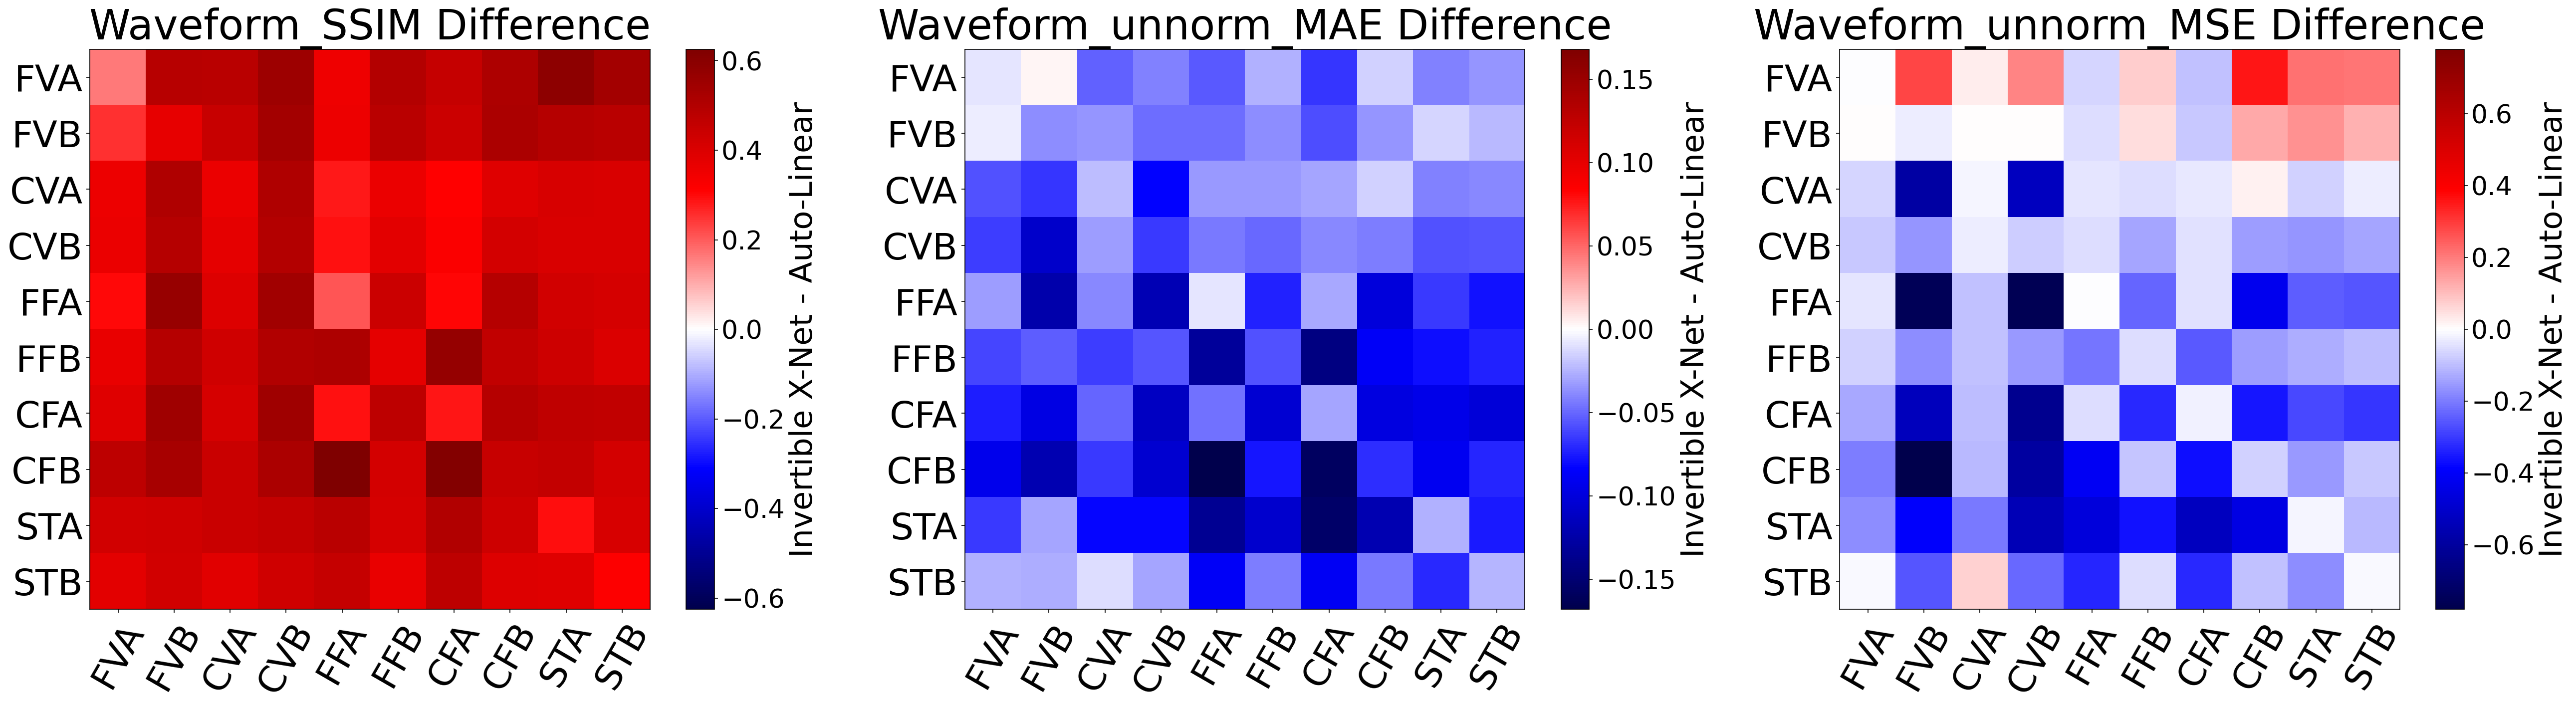

In [21]:
model_labels = ["Invertible X-Net", "Auto-Linear"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
plt.show()

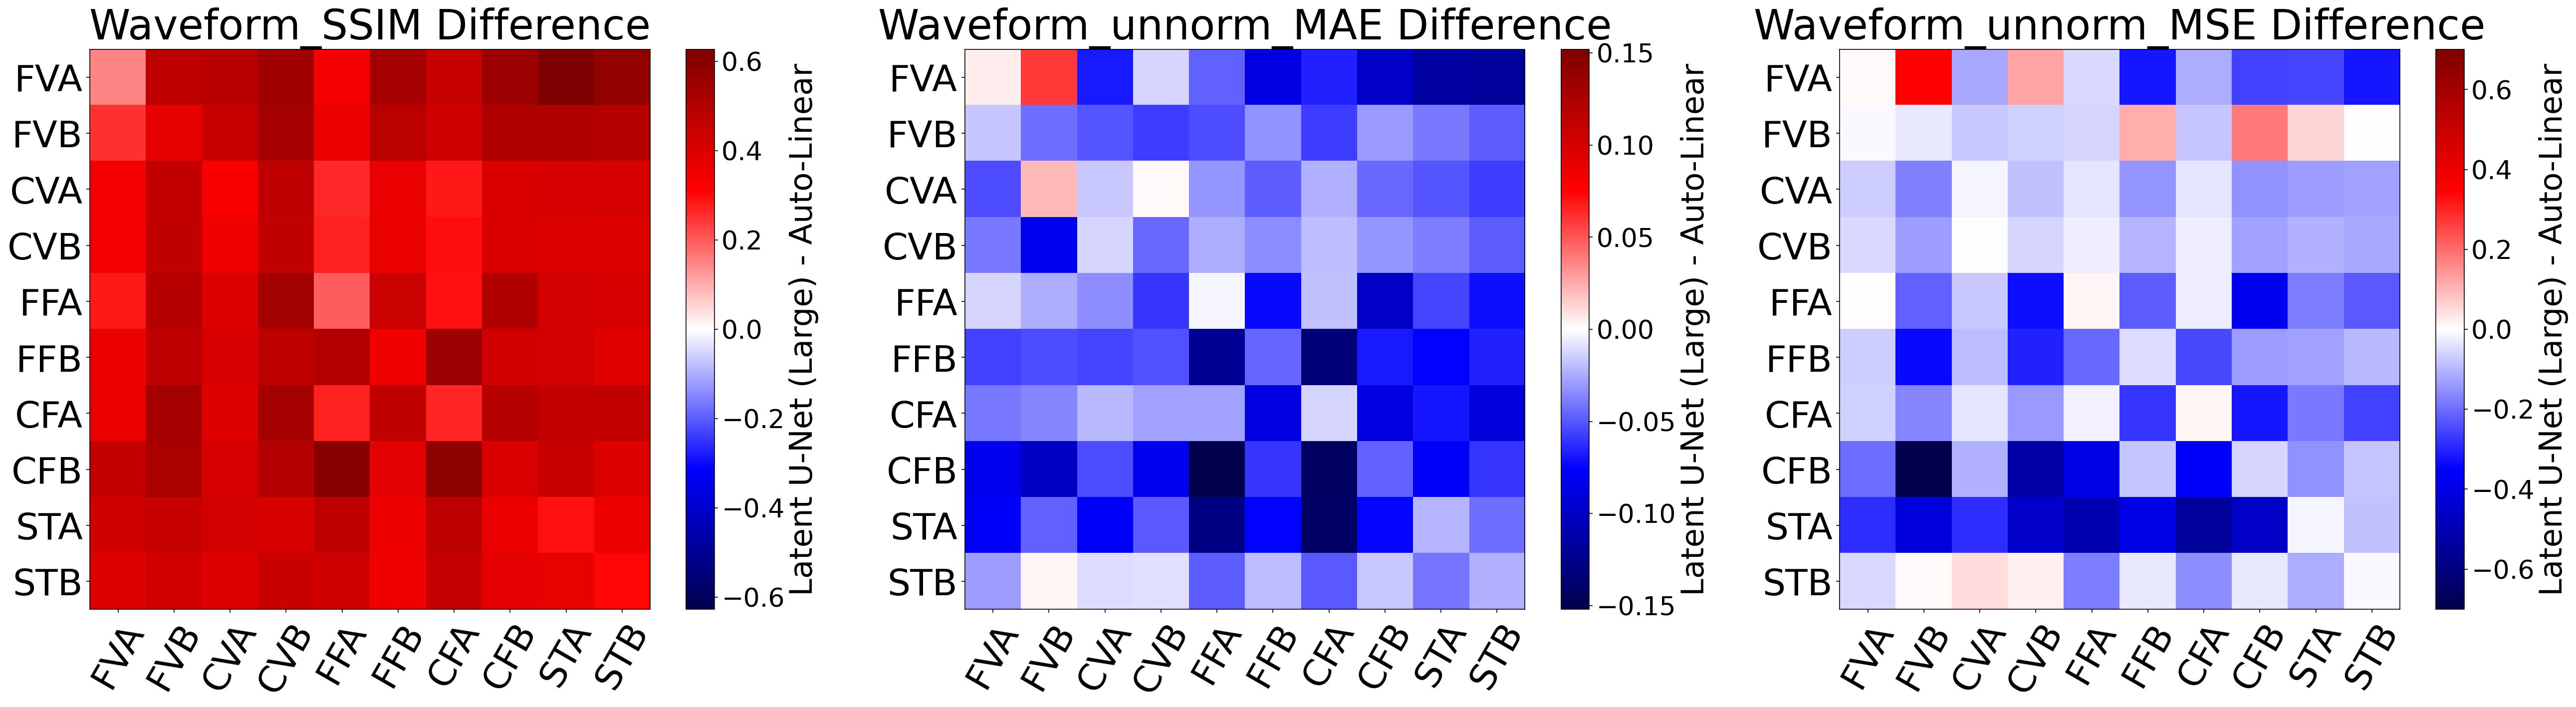

In [22]:
model_labels =  ["Latent U-Net (Large)", "Auto-Linear"]

eval_1 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[0]]+".xlsx"))
eval_2 = load_workbook(os.path.join(basepath, prefix+model_dict[model_labels[1]]+".xlsx"))


fig, axes = plt.subplots(1,3, figsize=(35,9), dpi=150)

for index, metric in enumerate(metric_list):
    model_1 = eval_1[metric]
    model_2 = eval_2[metric]

    row = len(model_names) + 2
    col = len(model_names) + 2
    result_diff = np.zeros(shape=(len(model_names),len(model_names)))
    for i in range(2,row):
        for j in range(2,col):
            val1 = model_1.cell(row=i, column=j).value
            val2 = model_2.cell(row=i, column=j).value
            result_diff[i-2][j-2] = val1-val2
    
    
    ax = axes[index]
    cax = ax.imshow(result_diff, cmap="seismic")
    ax.set_xticks(np.arange(result_diff.shape[0]))
    ax.set_xticklabels(coded_model_names, fontsize=35, rotation=60)
    ax.set_yticks(np.arange(result_diff.shape[1]))
    ax.set_yticklabels(coded_model_names, fontsize=35)
    ax.set_title(f'{metric} Difference', fontsize=40)
    cbar = fig.colorbar(cax)
    cbar.set_label(label=f"{model_labels[0]} - {model_labels[1]}", size=30)
    cbar.ax.tick_params(labelsize=25)
    lim = np.max([np.absolute(np.min(result_diff)), 
                 np.absolute(np.max(result_diff))])
    cax.set_clim(-lim,lim)

plt.tight_layout()
plt.savefig(save_dir+f"{mode}_{model_labels[0]}-{model_labels[1]}.png", dpi=150, bbox_inches="tight")
plt.show()